En este ejercicio se propone verificar la predicción de ley de Zipf. Para ello, descargue desde Project Gutenberg el texto del Quijote de Cervantes y escriba un programa que extraiga los términos y calcule sus frecuencias (el programa debe generar la lista ordenada por frecuencia descendente).

In [2]:
import re

def sacar_acentos(texto):
    texto = re.sub(r"[áàäâã]", "a", texto)
    texto = re.sub(r"[éèëê]", "e", texto)
    texto = re.sub(r"[íìïî]", "i", texto)
    texto = re.sub(r"[óòöôõ]", "o", texto)
    texto = re.sub(r"[úùüû]", "u", texto)
    return texto


def procesar(texto):
    datos = {}
    texto = texto.lower()  # Convertir a minusculas
    texto = sacar_acentos(texto)
    texto = re.sub(r"[^a-zñ\s]", "", texto)  # Eliminar caracteres especiales
    tokens = texto.split()  # Tokenizar (En este caso separo por espacios)
    
    for token in tokens:
        datos[token] = datos.get(token, 0) + 1  
    
    return datos

with open("quijote.txt", "r", encoding="utf-8") as f:
    texto = f.read()
    frecuencias = procesar(texto.strip())
    datos = dict(sorted(frecuencias.items(), key=lambda item: item[1], reverse=True))
    
datos


{'que': 21616,
 'de': 18495,
 'y': 18271,
 'la': 10492,
 'a': 9934,
 'el': 9547,
 'en': 8284,
 'no': 6356,
 'se': 5139,
 'los': 4769,
 'con': 4275,
 'por': 3945,
 'lo': 3492,
 'las': 3486,
 'le': 3420,
 'su': 3388,
 'don': 2718,
 'del': 2668,
 'como': 2554,
 'me': 2345,
 'si': 2314,
 'mas': 2295,
 'quijote': 2245,
 'mi': 2207,
 'sancho': 2174,
 'es': 2145,
 'yo': 2077,
 'un': 1943,
 'dijo': 1808,
 'al': 1757,
 'para': 1465,
 'porque': 1400,
 'ni': 1377,
 'una': 1334,
 'tan': 1245,
 'o': 1217,
 'todo': 1181,
 'esta': 1165,
 'sin': 1158,
 'señor': 1065,
 'asi': 1065,
 'respondio': 1063,
 'ser': 1059,
 'bien': 1052,
 'ha': 1052,
 'sus': 1051,
 'habia': 1037,
 'pero': 1015,
 'merced': 900,
 'quien': 894,
 'esto': 886,
 'pues': 865,
 'vuestra': 852,
 'todos': 818,
 'este': 818,
 'ya': 785,
 'donde': 784,
 'cuando': 778,
 'era': 757,
 'cual': 749,
 'te': 726,
 'sino': 694,
 'dos': 685,
 'caballero': 677,
 'fue': 655,
 'ella': 604,
 'tu': 599,
 'decir': 578,
 'he': 539,
 'muy': 535,
 'hacer':

Calcule la curva de ajuste utilizando la función Polyfit del módulo NumPy. Con los datos crudos y los estimados grafique en la notebook ambas distribuciones (haga 2 gráficos, uno en escala lineal y otro en log-log). ¿Cómo se comporta la predicción? ¿Qué conclusiones puede obtener? 

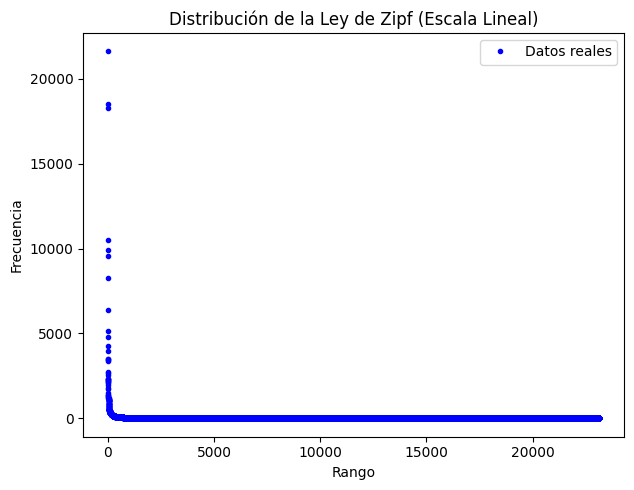

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def grafico_lineal(frecuencias):
    rangos = np.arange(1, len(frecuencias) + 1)  # Posicion de la palabra
    frecuencias = np.array([freq for _, freq in frecuencias.items()])  # Frecuencia de la palabra
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(rangos, frecuencias, "bo", markersize=3, label="Datos reales")
    plt.xlabel("Rango")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de la Ley de Zipf (Escala Lineal)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
grafico_lineal(datos)
    

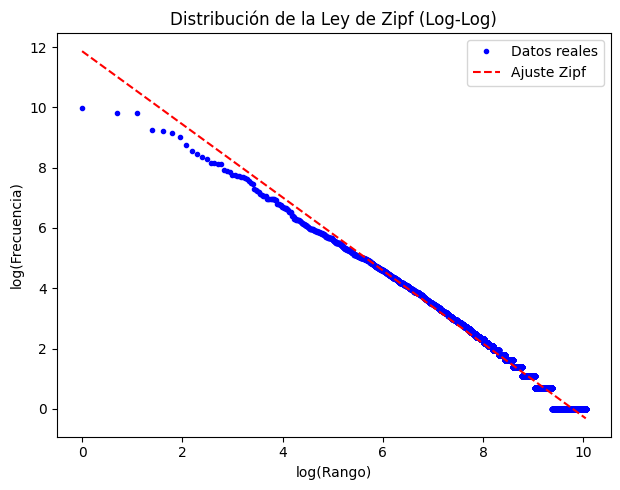

Pendiente: -1.211929358220266
Ordenada: 11.864509119738528


In [ ]:
def grafico_log_log(frecuencias):
    rangos = np.arange(1, len(frecuencias) + 1)  # Posicion de la palabra
    frecuencias = np.array([freq for _, freq in frecuencias.items()])  # Frecuencia de la palabra
    
    # Aplicar logaritmo para el ajuste
    log_rangos = np.log(rangos)
    log_frecuencias = np.log(frecuencias)
    
    # Ajuste de la curva con polyfit
    coeficientes = np.polyfit(log_rangos, log_frecuencias, 1)  # Ajusta dos puntos x e y a un polinomio, devuelve la pendiente y la ordenada
    ajuste = np.polyval(coeficientes, log_rangos) # Evalua un polinomio en los puntos x, asi se calcula la estimacion
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 2)
    plt.plot(log_rangos, log_frecuencias, "bo", markersize=3, label="Datos reales")
    plt.plot(log_rangos, ajuste, "r--", label="Ajuste Zipf")
    plt.xlabel("log(Rango)")
    plt.ylabel("log(Frecuencia)")
    plt.title("Distribución de la Ley de Zipf (Log-Log)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"Pendiente: {coeficientes[0]}")
    print(f"Ordenada: {coeficientes[1]}")

grafico_log_log(datos)